Epoch 0/10000, Loss: 0.6953, Weights: [0.013081224453875055, 0.04453692675395901, -0.027237860199573163]
Epoch 100/10000, Loss: 0.4737, Weights: [-0.3218504618306545, 1.259028812023835, -0.14248598921379688]
Epoch 200/10000, Loss: 0.4437, Weights: [-0.7593159844856247, 1.5759644641376278, -0.12051352634105249]
Epoch 300/10000, Loss: 0.4223, Weights: [-1.190851360577775, 1.732427903899728, -0.0793259438171734]
Epoch 400/10000, Loss: 0.4041, Weights: [-1.6021584733466059, 1.8370269831740043, -0.034759767339276194]
Epoch 500/10000, Loss: 0.3881, Weights: [-1.9904415500023087, 1.921370568928161, 0.008957621372484148]
Epoch 600/10000, Loss: 0.3740, Weights: [-2.356044738820218, 1.9964132139577941, 0.0505737581239074]
Epoch 700/10000, Loss: 0.3615, Weights: [-2.700318094205315, 2.0662041446130224, 0.08980573582123332]
Epoch 800/10000, Loss: 0.3503, Weights: [-3.0248901462071243, 2.1323067903395243, 0.12670440784957743]
Epoch 900/10000, Loss: 0.3404, Weights: [-3.3313962133911077, 2.195370861

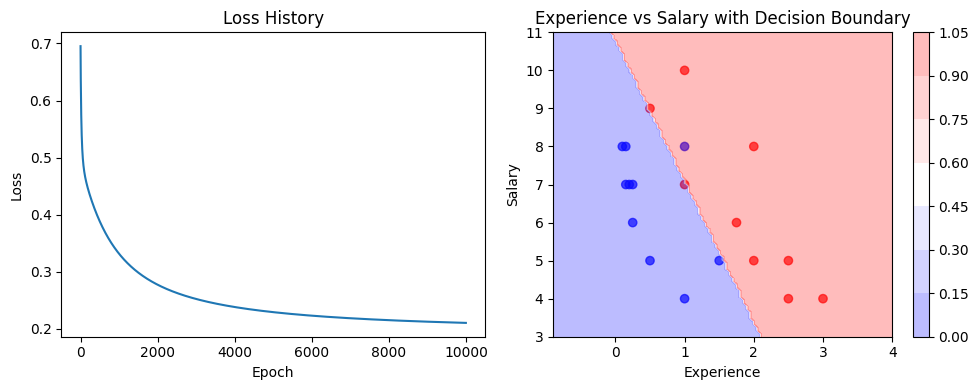

Epoch 0/10000, Loss: 0.1783, Weights: [0.013081224453875055, 0.04453692675395901, -0.027237860199573163]
Epoch 100/10000, Loss: 0.1324, Weights: [-0.3218504618306545, 1.259028812023835, -0.14248598921379688]
Epoch 200/10000, Loss: 0.1332, Weights: [-0.7593159844856247, 1.5759644641376278, -0.12051352634105249]
Epoch 300/10000, Loss: 0.1258, Weights: [-1.190851360577775, 1.732427903899728, -0.0793259438171734]
Epoch 400/10000, Loss: 0.1170, Weights: [-1.6021584733466059, 1.8370269831740043, -0.034759767339276194]
Epoch 500/10000, Loss: 0.1089, Weights: [-1.9904415500023087, 1.921370568928161, 0.008957621372484148]
Epoch 600/10000, Loss: 0.1020, Weights: [-2.356044738820218, 1.9964132139577941, 0.0505737581239074]
Epoch 700/10000, Loss: 0.0962, Weights: [-2.700318094205315, 2.0662041446130224, 0.08980573582123332]
Epoch 800/10000, Loss: 0.0914, Weights: [-3.0248901462071243, 2.1323067903395243, 0.12670440784957743]
Epoch 900/10000, Loss: 0.0874, Weights: [-3.3313962133911077, 2.195370861

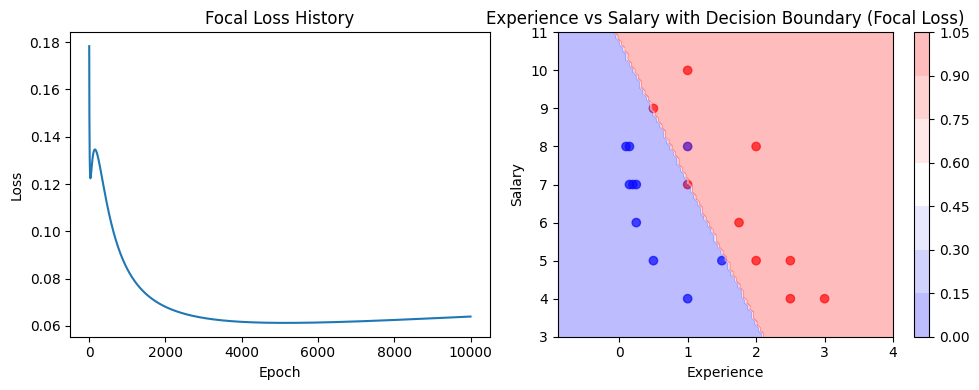

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def loss(y_true, y_pred):
    epsilon = 1e-15  
    y_pred = max(min(y_pred, 1 - epsilon), epsilon)
    return -y_true * math.log(y_pred) - (1 - y_true) * math.log(1 - y_pred)

def focal_loss(y_true, y_pred, gamma=2.0):
    epsilon = 1e-15
    y_pred = max(min(y_pred, 1 - epsilon), epsilon)
    loss_value = -y_true * ((1 - y_pred) ** gamma) * math.log(y_pred) - (1 - y_true) * (y_pred ** gamma) * math.log(1 - y_pred)
    return loss_value
    
def predict_prob(x, weights):
    z = sum(w * xi for w, xi in zip(weights, x))
    return sigmoid(z)

def predict(x, weights):
    return 1 if predict_prob(x, weights) >= 0.5 else 0

def compute_gradients(X, y, weights):
    m = len(y)
    gradients = [0, 0, 0]
    
    for i in range(m):
        y_pred = predict_prob(X[i], weights)
        error = y_pred - y[i]
        
        for j in range(len(weights)):
            gradients[j] += error * X[i][j]
    
    for j in range(len(gradients)):
        gradients[j] /= m
        
    return gradients

def train_model(X, y, weights, learning_rate, epochs):
    loss_history = []
    
    for epoch in range(epochs):
        y_preds = [predict_prob(x, weights) for x in X]
        
        current_loss = sum(loss(y[i], y_preds[i]) for i in range(len(y))) / len(y)
        loss_history.append(current_loss)
        
        gradients = compute_gradients(X, y, weights)
        
        for i in range(len(weights)):
            weights[i] -= learning_rate * gradients[i]
            
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {current_loss:.4f}, Weights: {weights}")
    
    return weights, loss_history

def train_model_focal(X, y, weights, learning_rate, epochs):
    loss_history = []
    
    for epoch in range(epochs):
        y_preds = [predict_prob(x, weights) for x in X]
        
        current_loss = sum(focal_loss(y[i], y_preds[i]) for i in range(len(y))) / len(y)
        loss_history.append(current_loss)
        
        gradients = compute_gradients(X, y, weights)
        
        for i in range(len(weights)):
            weights[i] -= learning_rate * gradients[i]
            
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {current_loss:.4f}, Weights: {weights}")
    
    return weights, loss_history

if __name__ == "__main__":
    with open("data/loan2.csv", "r") as f:
        lines = f.readlines()
        data = [list(map(float, line.strip().split(","))) for line in lines[1:]]
        
        X = [[1, row[0], row[1]] for row in data] 
        y = [row[-1] for row in data]
        
        weights = [0.02, 0.02, 0.02]
        learning_rate = 0.1
        epochs = 10000
        
        final_weights, loss_history = train_model(X, y, weights, learning_rate, epochs)
        print("Final weights:", final_weights)
        
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(loss_history)
        plt.title('Loss History')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        
        plt.subplot(1, 2, 2)
        experience = [row[0] for row in data]
        salary = [row[1] for row in data]
        
        plt.scatter(experience, salary, c=y, cmap='bwr', alpha=0.7)
        plt.xlabel('Experience')
        plt.ylabel('Salary')
        plt.title('Experience vs Salary with Decision Boundary')
        
        x_min, x_max = min(experience) - 1, max(experience) + 1
        y_min, y_max = min(salary) - 1, max(salary) + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        
        Z = np.array([predict([1, x1, x2], final_weights) for x1, x2 in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
        plt.colorbar()
        plt.tight_layout()
        plt.show()
    
    with open("data/loan2.csv", "r") as f:
        lines = f.readlines()
        data = [list(map(float, line.strip().split(","))) for line in lines[1:]]
        
        X = [[1, row[0], row[1]] for row in data] 
        y = [row[-1] for row in data]
        
        weights = [0.02, 0.02, 0.02]
        learning_rate = 0.1
        epochs = 10000

        weights_focal = [0.02, 0.02, 0.02]
        learning_rate_focal = 0.1
        epochs_focal = 10000
        
        final_weights_focal, loss_history_focal = train_model_focal(X, y, weights_focal, learning_rate_focal, epochs_focal)
        print("Final weights (Focal Loss):", final_weights_focal)
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(loss_history_focal)
        plt.title('Focal Loss History')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.subplot(1, 2, 2)
        plt.scatter(experience, salary, c=y, cmap='bwr', alpha=0.7)
        plt.xlabel('Experience')
        plt.ylabel('Salary')
        plt.title('Experience vs Salary with Decision Boundary (Focal Loss)')
        
        x_min, x_max = min(experience) - 1, max(experience) + 1
        y_min, y_max = min(salary) - 1, max(salary) + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        
        Z = np.array([predict([1, x1, x2], final_weights_focal) for x1, x2 in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
        plt.colorbar()
        plt.tight_layout()
        plt.show()

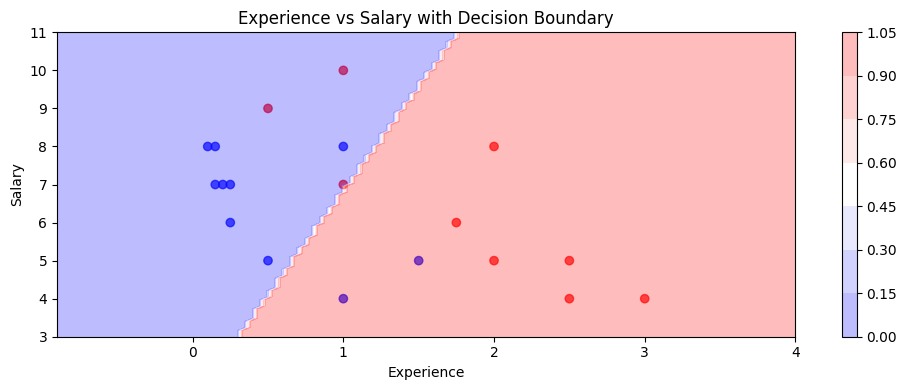

In [12]:
weights = [0.32927284727520584, 1.3358826368394727, -0.24359505100382328]
# draw the decision boundary
def draw_decision_boundary(X, y, weights):
    plt.figure(figsize=(10, 4))
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', alpha=0.7)
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.title('Experience vs Salary with Decision Boundary')
    
    x_min, x_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1
    y_min, y_max = min(X[:, 2]) - 1, max(X[:, 2]) + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = np.array([predict([1, x1, x2], weights) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    
# Example usage
if __name__ == "__main__":
    with open("data/loan2.csv", "r") as f:
        lines = f.readlines()
        data = [list(map(float, line.strip().split(","))) for line in lines[1:]]
        
        X = np.array([[1, row[0], row[1]] for row in data]) 
        y = np.array([row[-1] for row in data])
        
        draw_decision_boundary(X, y, weights)